In [1]:
import random
import pylab as pl
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
class Frame:
    def __init__(self, slot_id, start_time, duration):
        self.slot_id = slot_id
        self.start_time=start_time
        self.duration = duration
        self.transmitting = False
    def move_next_slot(self):
        self.slot_id += 1
        self.start_time += self.duration
    def transmitted(self):
        self.transmitting = True
    def waiting(self):
        self.transmitting = False
        self.move_next_slot()
    def wait_random(self):
        self.transmitting = False
        self.slot_id += 1
        self.start_time += random.uniform(0, self.duration)
    def show(self):
        print self.slot_id, self.start_time, self.transmitting

In [5]:
def get_frames(frames,slot_id):
    result=[]
    for frame in frames:
        if frame.slot_id == slot_id:
            result.append(frame)
    return result

In [90]:
def get_frames_st(frames,st):
    result=[]
    for frame in frames:
        if frame.start_time == st:
            result.append(frame)
    return result

In [12]:
N = 1000
sorted_numbers = sorted([random.uniform(0,1) for i in range(N)])
G = pl.frange(0.1, 5, 0.1)
G = [3]
p = 0.01
tputs = []
count = 0
for x in G:
    count = 0
    frames = []
    no_slots = int(N/x)
    slot_status = [] + [False]*no_slots
    for packet in sorted_numbers:
        frame = Frame(int(packet*no_slots), packet, x/N) #packet * N/x gives slot id
        frames.append(frame)
        #frame.show()
    
    wasted_slots = []
    #print "No of Slots: %d" %no_slots
    for slot_id in range(0,no_slots):
        #print "Slot %d" %slot_id,
        f_per_slot = get_frames(frames, slot_id) #get frames per slot
        #print 'items size: %d' % len(f_per_slot)
        transmited = [] + [False] * len(f_per_slot) #set transmit flag for each frame as false
        attemted = False
        
        for i in range(0, len(f_per_slot)):#for each frames in a slot = slot_id
            busy = slot_status[slot_id]
            if not busy:
                if(random.uniform(0,1) < p):#transmit by prob. p
                    transmited[i] = True
                    f_per_slot[i].transmitted()
                    attempted = True
                    slot_status[slot_id] = True
                    count += 1
                else:
                    f_per_slot[i].waiting()
            else:
                f_per_slot[i].waiting()
        #print trasmited
        if transmited.count(True) != 1: #either slot is empty, or more than one transmission occured
            wasted_slots.append(slot_id)
        if transmited.count(True) == 1: #one transmission occured
            count += 1
        #if transmited.count(True) == 1 and transmited.count(False)>=1:
            #print 'Transmitted by luck'
        if transmited.count(True) > 1 and attempted:
            for i in range(0, len(f_per_slot)):
                if f_per_slot[i].transmitting:
                    frames.remove(f_per_slot[i])
                    #sorted(frames, key=lambda x: x.start_time)
                else:
                    f_per_slot[i].waiting()
    #print len(wasted_slots)
    #print 'after'
    #for frame in frames:
        #frame.show()
    #tputs.append((no_slots - (len(wasted_slots))) / float(no_slots) )
    #print len(wasted_slots), no_slots
    tputs.append(count * x/float(N))
    #print count

In [13]:
print tputs

[1.794]


ValueError: x and y must have same first dimension

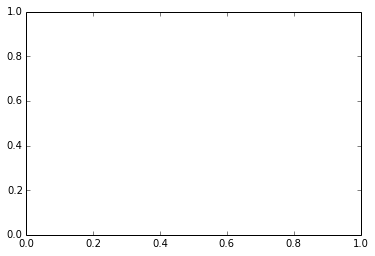

In [7]:
plt.plot(G, tputs)
plt.xlabel("G")
plt.ylabel("Throughput")
plt.title("G vs Throughput for CSMA")
plt.show()

In [99]:
N = 100
packets = sorted([random.uniform(0,1) for i in range(N)])
G = pl.frange(0.1, 10, 0.1)
#G = [1.5]
p = 1
tputs = []
count = 0
for x in G:
    count = 0
    end_time = 0
    i = 1
    frames = []
    no_slots = int(N/x)
    slot_status = [] + [False]*no_slots
    for packet in packets:
        frame = Frame(int(packet*no_slots), packet, x/N) #packet * N/x gives slot id
        frames.append(frame)
        #frame.show()
        
    last_transmitted = frames[0]
    while i < len(frames):
        #print i,
        if frames[i].start_time > 1.0:
            frames.remove(frames[i])
            continue
        if frames[i].start_time  > frames[i-1].start_time + x/float(N): #if channel is idle
            if(random.uniform(0,1) < p): #transmit with p
                count += 1
                last_transmitted = frames[i]
                i += 1
            else:#move one slot with 1-p
                frames[i].start_time = frames[i].start_time + x/float(N)
                frames = sorted(frames, key=lambda x: x.start_time)
        elif frames[i].start_time <= frames[i-1].start_time + x/float(N):#channel is busy
            frames[i].start_time = last_transmitted.start_time + x/float(N) #wait until channel becomes idle
            frames = sorted(frames, key=lambda x: x.start_time)
        else:
            frames.remove(frames[i])
            continue
            fs = get_frames_st(frames, frames[i].start_time)
            indices = []
            for i in range (0,len(fs)):
                if(random.uniform(0,1) < p): #transmit with p
                    indices.append(i)
            if len(indices) == 1:
                count += 1
                last_transmitted = frames[indices[0]]
                i += 1
            elif len(indices) > 1:
                for index in indices:
                    frames.remove[fs[i]]
                    i += 1
        #print len (frames)
    tputs.append(count * x/ float(N))

KeyboardInterrupt: 

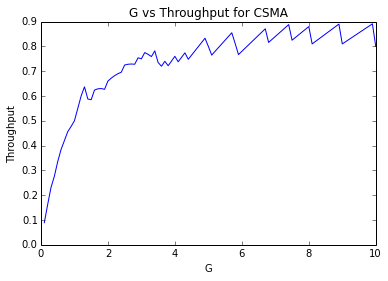

In [97]:
plt.plot(G, tputs)
plt.xlabel("G")
plt.ylabel("Throughput")
plt.title("G vs Throughput for CSMA")
plt.show()